# Simulacre Prova escrita 2 - Estadística.

## Autor: Miquel Àngel Amorós Alberich

#### Consulta al professor quan hagis aconseguit cada gràfic que es demana.

## Part 1. Preguntes bàsiques, gestió de valors NA, i outliers. (3,5 punts)

### Preguntes bàsiques. 1.5 punts.
### Gràfic d'outliers. 2 punts.

Us donem el codi de la importació i el context de les dades.

### Importació del Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

/home/mamorosal/anaconda3/envs/bio/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
incidence_raw = pd.read_csv("incidence-rate-2020.csv", sep=';', decimal=",")

incidence_new = copy.deepcopy(incidence_raw)

print(incidence_raw.dtypes)

print(incidence_raw.head(20))

GROUP                   object
CODE                    object
NAME                    object
YEAR                     int64
DISEASE                 object
DISEASE_DESCRIPTION     object
DENOMINATOR             object
INCIDENCE_RATE         float64
dtype: object
          GROUP CODE            NAME  YEAR     DISEASE DISEASE_DESCRIPTION  \
0     Countries  AFG     Afghanistan  1980      YFEVER        Yellow fever   
1     Countries  AFG     Afghanistan  1980    NTETANUS    Neonatal tetanus   
2     Countries  AFG     Afghanistan  1980    TTETANUS       Total tetanus   
3     Countries  AFG     Afghanistan  1980     MEASLES             Measles   
4     Countries  AFG     Afghanistan  1980       POLIO       Poliomyelitis   
5     Countries  AFG     Afghanistan  1980  DIPHTHERIA          Diphtheria   
6     Countries  AFG     Afghanistan  1980   PERTUSSIS           Pertussis   
7   WHO Regions  afr  African Region  1980  DIPHTHERIA          Diphtheria   
8   WHO Regions  afr  African Region

### Explicació del context. Què son aquestes dades? Posar referències.

Representen els ratios d'incidencia de casos de diferents enfermedades contagioses en molts països. 
Aquest ratio està representat pel camp **INCIDENCE_RATE.**

S'utilitzen diverses maneres de calcular aquestes ratios, ho indica el camp **DENOMINATOR.**
No és el mateix mesurar 'per 1,000,000 total population' que ';per 1,000,000 <15 population'

**GROUP** Pot ser un país, una agrupació de països o un estat.

**CODE** és la abreviatura del nom del país/estat/grup **NAME** .

**DISEASE** és el nom de la enfermetat.

**YEAR**: Des de 1980 a 2021

#### Referència:

Dataset extret del portal Inmunization Data, de la WHO (la OMS)

[https://immunizationdata.who.int/listing.html?topic=&location=]

#### Quantes files té el dataset ? 

In [4]:
len (incidence_new)

72138

### Llista els valors possibles que poden tenir els camps DENOMINATOR i el DISEASE.

In [5]:
incidence_new.loc[:,"DENOMINATOR"].unique()

array(['per 1,000,000 total population', 'per 1,000 live births',
       'per 1,000,000 <15 population', 'per 1000 live births',
       'per 10,000 live births'], dtype=object)

In [6]:
incidence_new.loc[:,"DISEASE"].value_counts()

POLIO         8137
MEASLES       8070
DIPHTHERIA    8064
PERTUSSIS     8064
NTETANUS      8059
TTETANUS      8028
YFEVER        8003
RUBELLA       4371
CRS           4324
MUMPS         4301
JAPENC        2717
Name: DISEASE, dtype: int64

### Optimització del dataframe.

Elimina la fila "DISEASE_DESCRIPTION". No és necessari tenir aquesta fila dins d'aquesta taula.

En SQL aquests valors estarien en una taula apart, accessible des d'una foreign key comuna entre les 2 taules, que seria DISEASE.

In [7]:
incidence_new.drop(columns=['DISEASE_DESCRIPTION'])

,GROUP,CODE,NAME,YEAR,DISEASE,DENOMINATOR,INCIDENCE_RATE
0,Countries,AFG,Afghanistan,1980,YFEVER,"per 1,000,000 total population",0.0
1,Countries,AFG,Afghanistan,1980,NTETANUS,"per 1,000 live births",0.0
2,Countries,AFG,Afghanistan,1980,TTETANUS,"per 1,000,000 total population",121.1
3,Countries,AFG,Afghanistan,1980,MEASLES,"per 1,000,000 total population",2429.9
4,Countries,AFG,Afghanistan,1980,POLIO,"per 1,000,000 <15 population",142.7
...,...,...,...,...,...,...,...
72133,Countries,ZWE,Zimbabwe,2020,MEASLES,"per 1,000,000 total population",0.2
72134,Countries,ZWE,Zimbabwe,2020,RUBELLA,"per 1,000,000 total population",0.9
72135,Countries,ZWE,Zimbabwe,2020,POLIO,"per 1,000,000 <15 population",0.0
72136,Countries,ZWE,Zimbabwe,2020,DIPHTHERIA,"per 1,000,000 total population",0.0


### Hi ha NAs? En quines columnes ? Quina columna en té més ? 

In [8]:
#incidence = incidence.dropna()
incidence_new.isna().sum()

# La columna INCIDENCE_RATE en té molts.

# para no tener NAs y teniendo en cuenta que solo en el ratio de incidencias tenemos podemos 
# convertir todos los NAs a 0 para poder hacer operaciones aritmeticas como sumar

GROUP                      0
CODE                       0
NAME                       0
YEAR                       0
DISEASE                    0
DISEASE_DESCRIPTION        0
DENOMINATOR                0
INCIDENCE_RATE         16336
dtype: int64

### Separar el dataframe en 2 parts: les files que tenen el GROUP = Countries i els que tenen GROUP = WHO_REGIONS.

#### Guarda els 2 dataframes en 2 fitxers. Us proporcionem una còpia dels fitxers a la carpeta output per si no us surt.

In [9]:
mask_regions = incidence_new.loc[:,"GROUP"] == "WHO Regions"

df_incidence_regions = incidence_new.loc[mask_regions,:]

df_incidence_regions.to_csv('incidence_rate_2020_regions.csv', index=False)

print(df_incidence_regions)

mask_countries = incidence_new.loc[:,"GROUP"] == "Countries"

df_incidence_countries = incidence_new.loc[mask_countries,:]

print(df_incidence_countries.dtypes)

df_incidence_countries.to_csv('incidence_rate_2020_countries.csv', index=False, sep=';', decimal=",")

             GROUP CODE                    NAME  YEAR     DISEASE  \
7      WHO Regions  afr          African Region  1980  DIPHTHERIA   
8      WHO Regions  afr          African Region  1980      YFEVER   
9      WHO Regions  afr          African Region  1980    TTETANUS   
10     WHO Regions  afr          African Region  1980   PERTUSSIS   
11     WHO Regions  afr          African Region  1980    NTETANUS   
...            ...  ...                     ...   ...         ...   
72071  WHO Regions  wpr  Western Pacific Region  2020    NTETANUS   
72072  WHO Regions  wpr  Western Pacific Region  2020       POLIO   
72073  WHO Regions  wpr  Western Pacific Region  2020      JAPENC   
72074  WHO Regions  wpr  Western Pacific Region  2020         CRS   
72075  WHO Regions  wpr  Western Pacific Region  2020    TTETANUS   

               DISEASE_DESCRIPTION                     DENOMINATOR  \
7                       Diphtheria  per 1,000,000 total population   
8                     Yellow fe

### Gràfics d'Outliers.

Des del fitxer <em>incidence_rate_2021_countries.csv<em> crea un gràfic plotbox de les enfermetats que es mesuren amb el denominador:
'per 1,000,000 total population'.

<em>Pista: Recomanem fer-lo amb seaborn, que permet seleccionar quina fila i columna volem posar al gràfic<em>

49763
GROUP                   object
CODE                    object
NAME                    object
YEAR                     int64
DISEASE                 object
DISEASE_DESCRIPTION     object
DENOMINATOR             object
INCIDENCE_RATE         float64
dtype: object


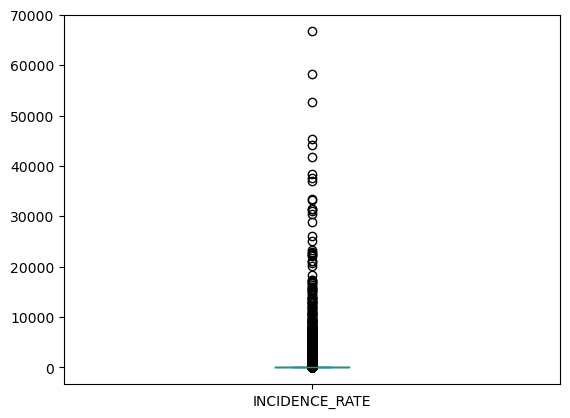

In [10]:
# Solució 1.
incidence_plot = df_incidence_countries.query("DENOMINATOR == 'per 1,000,000 total population'")

print(len(incidence_plot))

print(incidence_plot.dtypes)

df_incidence_countries.loc[:,'INCIDENCE_RATE'].plot.box().figsize=(12, 3)


<AxesSubplot:xlabel='INCIDENCE_RATE', ylabel='DISEASE'>

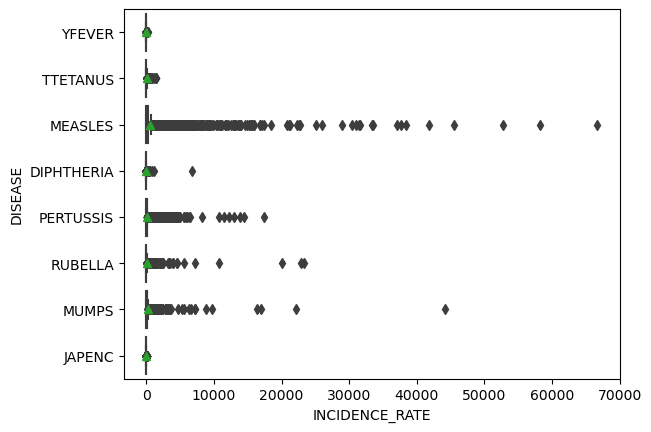

In [11]:
# Solució 2.
incidence_plot_2 = df_incidence_countries.query("DENOMINATOR == 'per 1,000,000 total population'")

sns.boxplot(data=incidence_plot_2, x='INCIDENCE_RATE', y='DISEASE', showmeans=True)

### Ara, fes un plotbox de les enfermetats a Espanya. També, pel mateix denominador d'abans. 'per 1,000,000 total population'

           GROUP CODE   NAME  YEAR     DISEASE DISEASE_DESCRIPTION  \
392    Countries  ESP  Spain  1980    TTETANUS       Total tetanus   
393    Countries  ESP  Spain  1980   PERTUSSIS           Pertussis   
395    Countries  ESP  Spain  1980     MEASLES             Measles   
396    Countries  ESP  Spain  1980      YFEVER        Yellow fever   
398    Countries  ESP  Spain  1980  DIPHTHERIA          Diphtheria   
...          ...  ...    ...   ...         ...                 ...   
70803  Countries  ESP  Spain  2020   PERTUSSIS           Pertussis   
70805  Countries  ESP  Spain  2020  DIPHTHERIA          Diphtheria   
70806  Countries  ESP  Spain  2020       MUMPS               Mumps   
70809  Countries  ESP  Spain  2020    TTETANUS       Total tetanus   
70810  Countries  ESP  Spain  2020      YFEVER        Yellow fever   

                          DENOMINATOR  INCIDENCE_RATE  
392    per 1,000,000 total population            13.3  
393    per 1,000,000 total population          

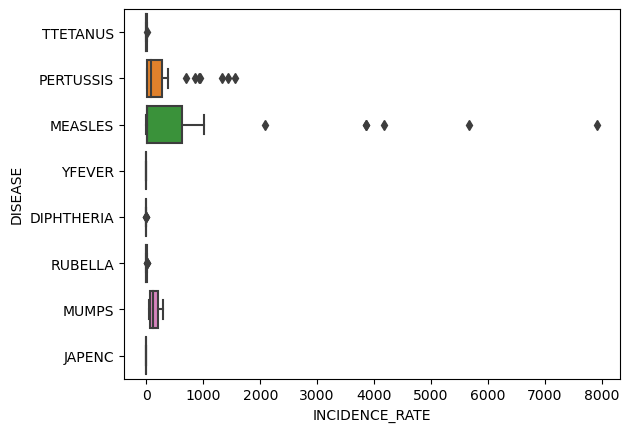

In [12]:
df_incidence_countries_esp = df_incidence_countries.query("NAME == 'Spain'")
df_incidence_countries_esp = df_incidence_countries_esp.query("DENOMINATOR == 'per 1,000,000 total population'")

sns.boxplot(data=df_incidence_countries_esp, x='INCIDENCE_RATE', y='DISEASE')

print(df_incidence_countries_esp)

### Part 2 - Fes una gràfica on es vegi la incidència de 3 enfermetats a Espanya des del 1980 fins el 2020, ambdós inclosos. (2,5 punts)

Per exemple: MEASLES, MUMPS, PERTUSSIS. 
<em>Serien: paperes, xarampió, tos ferina.</em>

<AxesSubplot:xlabel='YEAR', ylabel='INCIDENCE_RATE'>

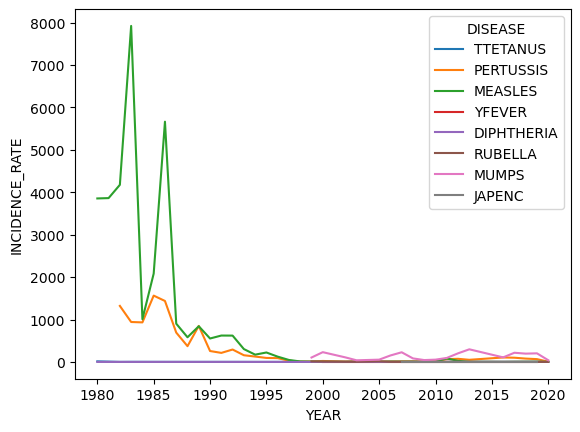

In [13]:
sns.lineplot(data=df_incidence_countries_esp, x="YEAR", y="INCIDENCE_RATE", hue="DISEASE")

# la grafica tiene algunos cortes y no sabría decir porque, podría ser que no tuvieran casos 
# o que por algún motivo no pudieron medir la incidencia durante ese periodo. 

## Part 3. Crea un gràfic que serveixin per comparar les dades de sarampió (measles) a Espanya i almenys a 2 països més. (2 punts)

['Algeria' 'Egypt' 'Spain' 'France' 'Italy' 'Morocco' 'Malta' 'Portugal'
 'Tunisia']


<AxesSubplot:xlabel='YEAR', ylabel='INCIDENCE_RATE'>

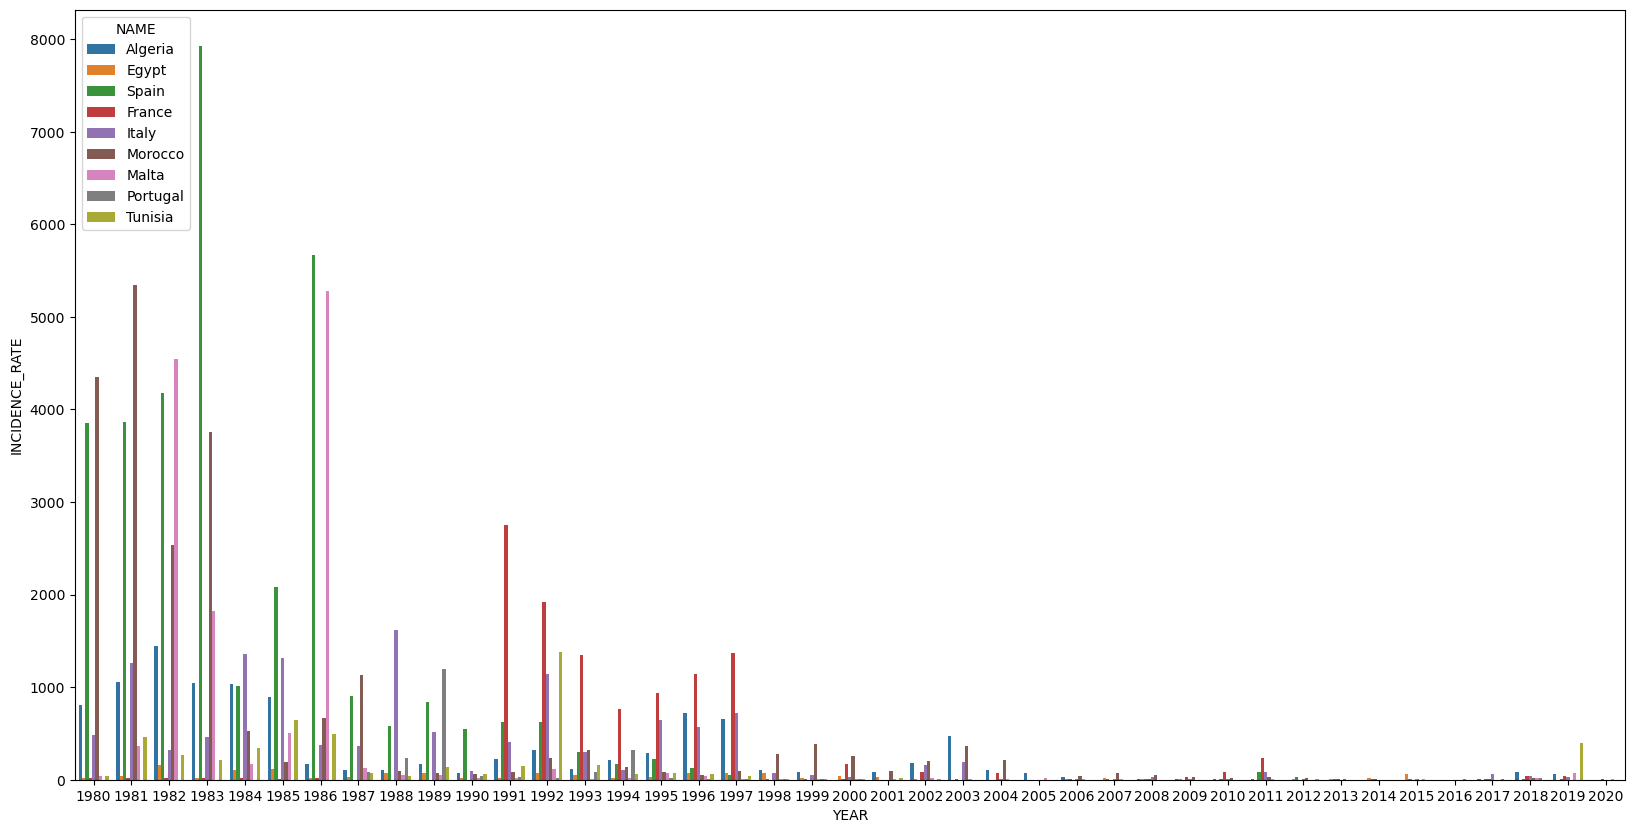

In [14]:
df_incidence_countries_measles = copy.deepcopy(df_incidence_countries)

# Only Measles
df_incidence_countries_measles = df_incidence_countries_measles.query("DISEASE == 'MEASLES'")

#Only some countries.
med_countries: list[str] = ['Spain', 'France', 'Morocco', 'Portugal', 'Algeria', 'Egypt', 'Italy', 'Malta', 'Tunisia']

#'Croatia', 'Türkiye', 'Greece', 'Lebanon' 

df_incidence_countries_measles = df_incidence_countries_measles[df_incidence_countries_measles['NAME'].isin(med_countries)]

print(df_incidence_countries_measles['NAME'].unique())

plt.figure(figsize=(20, 10))
sns.barplot(data=df_incidence_countries_measles, x="YEAR", y="INCIDENCE_RATE", hue="NAME")


## Part 4. Scatterplots i/o recta de regressió entre parelles d'enfermetats en un país. (2 punts)

Ens demanen comparar aquestes parelles d'enfermetats; per saber si existeix correlació entre elles.

Com a mínim ens demanen estudiar aquestes:

1. PERTUSSIS i MEASELS. 
2. MUMPS i PERTUSSIS.

### Veus alguna correlació?

#### Primer, pinto una recta de regressió únicament del xarampió.

       YEAR  INCIDENCE_RATE
395    1980          3854.9
1775   1981          3863.1
3153   1982          4176.0
4530   1983          7923.0
5914   1984          1008.5
7290   1985          2082.5
8668   1986          5664.8
10047  1987           902.2
11428  1988           581.5
12803  1989           841.2
14186  1990           552.3
15562  1991           622.0
16943  1992           620.6
18321  1993           303.2
19700  1994           171.4
21080  1995           222.4
22457  1996           124.4
23857  1997            46.0
25264  1998            11.1
26796  1999             6.1
28679  2000             3.7
32517  2002             1.6
34479  2003             6.0
36467  2004             0.6
38459  2005             0.5
40460  2006             8.1
42611  2007             5.9
44774  2008             6.4
46866  2009             0.9
48992  2010             6.4
51122  2011            80.7
53289  2012            25.6
55436  2013             2.8
57602  2014             3.3
59742  2015         

<Figure size 2000x1000 with 0 Axes>

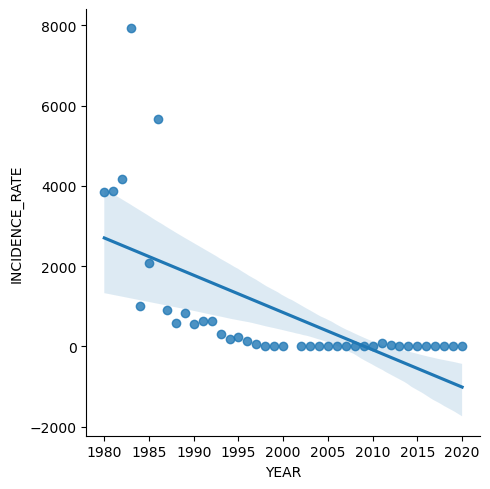

In [15]:
# incidence_graph.loc[:,"TTETANUS"]
# sns.scatterplot();

df_incidence_measels = df_incidence_countries.query("NAME == 'Spain'")
df_incidence_measels = df_incidence_measels.query("DISEASE == 'MEASLES'")
df_incidence_measels = df_incidence_measels.loc[:,['YEAR','INCIDENCE_RATE']]

print(df_incidence_measels)

plt.figure(figsize=(20, 10))
# sns.scatterplot(x='YEAR',y='INCIDENCE_RATE',data=df_incidence_measels)
# los puntos són muy dispersos y no podriamos decir que hay una correlación entre las dos graficas
sns.lmplot(x='YEAR',y='INCIDENCE_RATE',data=df_incidence_measels,fit_reg=True)
# En este caso los puntos están un poco menos dispersos, pero tampoco se podría decir que hay una correlación


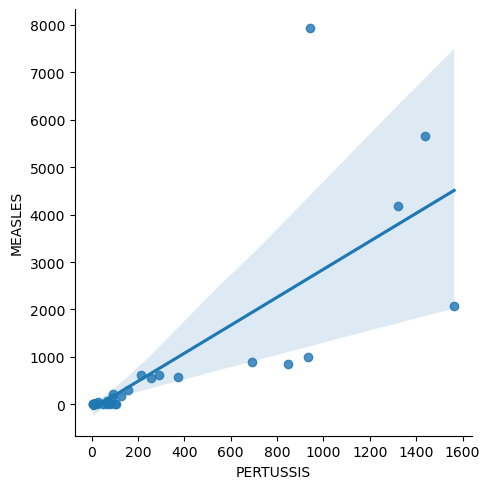

In [16]:
## Per a poder fer bé la comparació de les 2 enfermetats.
def df_incidence_rate_by_disease(diseases:str, df:pd.DataFrame): 
    result = df.query("NAME == 'Spain'")
    result = result.query("DISEASE == @diseases")
    result = result.loc[:,['YEAR','INCIDENCE_RATE']]
    result = result.set_index("YEAR")
    result = result.rename(columns={"INCIDENCE_RATE":diseases})
    return result

df_incidence_measels = df_incidence_rate_by_disease('MEASLES',df_incidence_countries)
df_incidence_pertussis = df_incidence_rate_by_disease('PERTUSSIS',df_incidence_countries)

corr_measels_pert = pd.concat([df_incidence_measels, df_incidence_pertussis], axis=1, join="inner")

sns.lmplot(x='PERTUSSIS',y='MEASLES',data=corr_measels_pert,fit_reg=True)

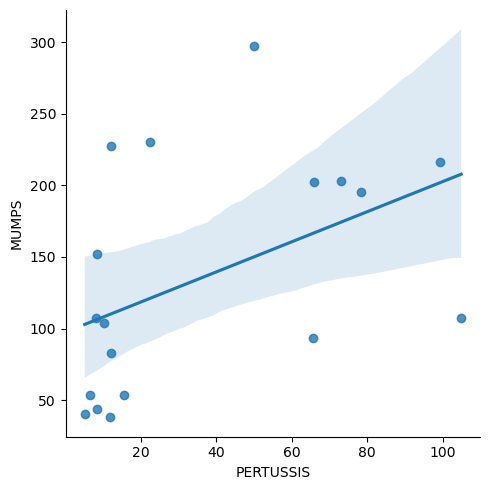

In [17]:
df_incidence_mumps = df_incidence_rate_by_disease('MUMPS',df_incidence_countries)

corr_mumps_pert = pd.concat([df_incidence_mumps, df_incidence_pertussis], axis=1, join="inner")

sns.lmplot(x='PERTUSSIS',y='MUMPS',data=corr_mumps_pert,fit_reg=True)

#### Opció 2. Correlation Matrix (pendent)

la primera part (crear els 3 dataframes) l'hem de fer igual.

Un cop tenim els 3 dataframes, els podem concatenar.


<AxesSubplot:>

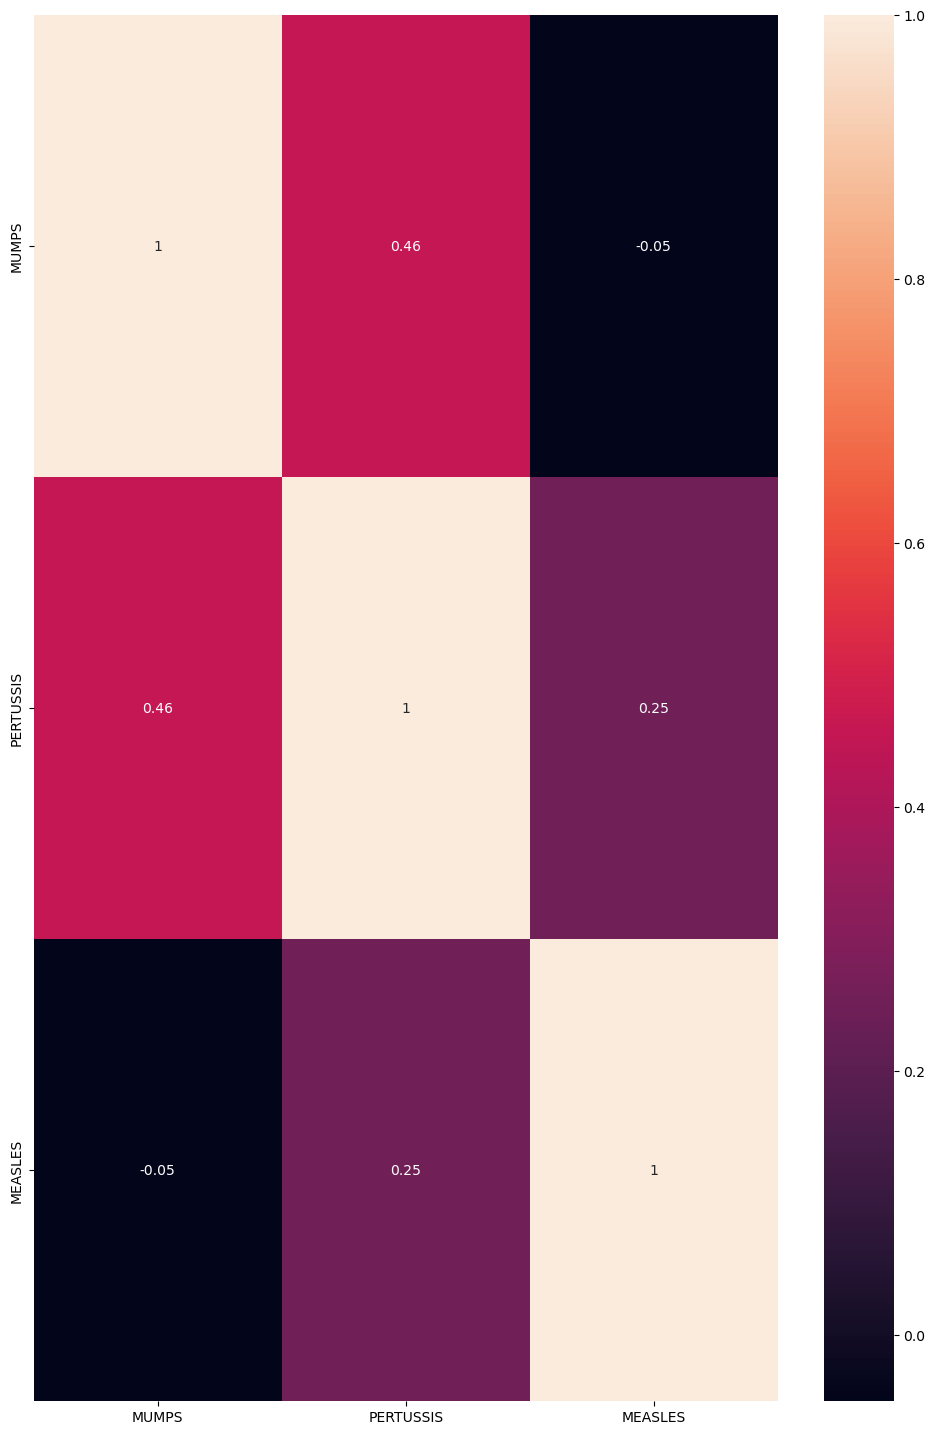

In [20]:
corr_matrix = pd.concat([df_incidence_mumps, df_incidence_pertussis, df_incidence_measels], axis=1, join="inner")

plt.figure(figsize=(12, 18))
sns.heatmap(corr_matrix.corr(method='pearson'), annot=True)

### Creus que hi ha una bona correlació entre aquests parells d'enfermetats ? 

#### Tos Farina - Xaramipió. 
Hi ha certa correlació, excepte en els moments que hi ha hagut més casos.

#### Tos Farina - Paperes. 
No es detecta cap correlació, tots els punts molt separats de la recta.